

---



---




---




# **FREEZING-OF-GAIT**


---



---



---


**Paulo Bastos & Raquel Barbosa,       February 11th 2023**
---




---



---


---



In [1]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=2f45c26ae7c76e2c2688ac21b9cddaef4e45734b672c8f356be42083df32e50a
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp
from scipy.stats import fisher_exact



---



**Import Data at the time of clinical evaluation**



---





In [4]:
FOG_Stim_conditions = pd.read_csv('FOG_Stim_conditions.csv', sep = ';')

In [5]:
FOG_Stim_conditions.dtypes

patient              object
UPDRS_III             int64
Item_3_10             int64
Item_3_11             int64
Item_3_12             int64
SWS_time_s          float64
SWS_N_FOG_Events    float64
HY                    int64
AIMS                  int64
AXIAL_score           int64
condition            object
dtype: object

In [6]:
FOG_Stim_conditions.isnull().sum()

patient             0
UPDRS_III           0
Item_3_10           0
Item_3_11           0
Item_3_12           0
SWS_time_s          6
SWS_N_FOG_Events    6
HY                  0
AIMS                0
AXIAL_score         0
condition           0
dtype: int64

In [ ]:
FOG_Stim_conditions.nunique()

patient             17
UPDRS_III           38
Item_3_10            4
Item_3_11            5
Item_3_12            5
SWS_time_s          69
SWS_N_FOG_Events    26
HY                   4
AIMS                18
AXIAL_score         17
condition            5
dtype: int64

In [ ]:
print(FOG_Stim_conditions)

   patient  UPDRS_III  Item_3_10  Item_3_11  Item_3_12  SWS_time_s  \
0       A1         55          2          2          0        49.0   
1       B2         79          2          3          0        75.0   
2       C3         65          3          4          1       439.0   
3       D4         75          4          4          4       258.0   
4       E5         59          2          3          3       111.0   
..     ...        ...        ...        ...        ...         ...   
80     M13         44          2          4          0       166.0   
81     N14         29          2          2          0        55.0   
82     O15         39          2          2          0        17.0   
83     P16         42          2          1          0        25.0   
84     Q17         41          2          0          3        71.0   

    SWS_N_FOG_Events  HY  AIMS  AXIAL_score            condition  
0                2.0   2     0            6     MED_OFF_STIM_OFF  
1                4.0   2 

In [ ]:
FOG_Stim_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient           85 non-null     object 
 1   UPDRS_III         85 non-null     int64  
 2   Item_3_10         85 non-null     int64  
 3   Item_3_11         85 non-null     int64  
 4   Item_3_12         85 non-null     int64  
 5   SWS_time_s        79 non-null     float64
 6   SWS_N_FOG_Events  79 non-null     float64
 7   HY                85 non-null     int64  
 8   AIMS              85 non-null     int64  
 9   AXIAL_score       85 non-null     int64  
 10  condition         85 non-null     object 
dtypes: float64(2), int64(7), object(2)
memory usage: 7.4+ KB


In [8]:
FOG_Stim_conditions.isnull().sum()

patient             0
UPDRS_III           0
Item_3_10           0
Item_3_11           0
Item_3_12           0
SWS_time_s          6
SWS_N_FOG_Events    6
HY                  0
AIMS                0
AXIAL_score         0
condition           0
dtype: int64



---


**There are 12 missing values**

---



In [7]:
FOG_Stim_conditions.groupby("condition").describe()["UPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,62.000000,9.899495,41.0,57.0,61.0,66.0,79.0
MED_OFF_STIM_ON,17.0,45.941176,8.562057,28.0,43.0,47.0,53.0,59.0
MED_ON_STIM_OFF,17.0,49.352941,10.451921,34.0,39.0,51.0,55.0,71.0
MED_ON_STIM_ON,17.0,38.588235,8.522462,21.0,34.0,42.0,45.0,48.0
MED_ON_STIM_ON_60Hz,17.0,40.705882,9.603155,21.0,37.0,41.0,46.0,62.0


In [9]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_10"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,2.647059,0.701888,2.0,2.0,3.0,3.0,4.0
MED_OFF_STIM_ON,17.0,2.352941,0.492592,2.0,2.0,2.0,3.0,3.0
MED_ON_STIM_OFF,17.0,2.529412,0.717430,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON,17.0,2.352941,0.606339,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,2.000000,0.353553,1.0,2.0,2.0,2.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_11"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,3.411765,0.795206,2.0,3.0,4.0,4.0,4.0
MED_OFF_STIM_ON,17.0,2.470588,1.545867,0.0,1.0,3.0,4.0,4.0
MED_ON_STIM_OFF,17.0,3.000000,1.224745,1.0,2.0,4.0,4.0,4.0
MED_ON_STIM_ON,17.0,2.411765,1.121318,1.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,2.000000,1.414214,0.0,1.0,2.0,3.0,4.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_12"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,1.882353,1.452685,0.0,1.0,2.0,3.0,4.0
MED_OFF_STIM_ON,17.0,1.117647,1.495090,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_OFF,17.0,1.235294,1.640481,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON,17.0,1.117647,1.615640,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,0.647059,1.114741,0.0,0.0,0.0,1.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["SWS_time_s"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,16.0,238.687500,204.465064,30.0,68.50,158.0,379.75,599.0
MED_OFF_STIM_ON,17.0,152.352941,151.172063,19.0,40.00,63.0,240.00,478.0
MED_ON_STIM_OFF,15.0,124.933333,95.050713,24.0,36.50,100.0,180.50,321.0
MED_ON_STIM_ON,15.0,64.133333,42.379015,22.0,30.50,62.0,80.00,184.0
MED_ON_STIM_ON_60Hz,16.0,69.687500,55.249397,17.0,35.75,57.5,67.25,221.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["SWS_N_FOG_Events"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,16.0,17.625000,16.185899,2.0,4.0,14.0,23.00,55.0
MED_OFF_STIM_ON,17.0,11.235294,13.021758,0.0,1.0,4.0,18.00,36.0
MED_ON_STIM_OFF,15.0,9.066667,7.977349,1.0,2.0,4.0,17.50,21.0
MED_ON_STIM_ON,15.0,3.933333,3.990465,1.0,1.5,2.0,4.50,14.0
MED_ON_STIM_ON_60Hz,16.0,5.437500,8.390222,0.0,1.0,2.5,4.75,31.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["HY"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,3.000000,1.118034,2.0,2.0,3.0,4.0,5.0
MED_OFF_STIM_ON,17.0,2.647059,0.861770,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_OFF,17.0,2.705882,1.104802,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON,17.0,2.529412,0.943242,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON_60Hz,17.0,2.176471,0.392953,2.0,2.0,2.0,2.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["AIMS"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,4.117647,7.857181,0.0,0.0,0.0,6.0,32.0
MED_OFF_STIM_ON,17.0,3.647059,6.900554,0.0,0.0,0.0,4.0,26.0
MED_ON_STIM_OFF,17.0,9.235294,9.391016,0.0,0.0,8.0,10.0,26.0
MED_ON_STIM_ON,17.0,10.000000,11.958261,0.0,2.0,4.0,18.0,44.0
MED_ON_STIM_ON_60Hz,17.0,12.235294,12.997737,0.0,2.0,6.0,20.0,42.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["AXIAL_score"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,9.823529,3.828108,3.0,8.0,10.0,12.0,16.0
MED_OFF_STIM_ON,17.0,7.647059,3.516767,2.0,5.0,8.0,11.0,14.0
MED_ON_STIM_OFF,17.0,8.352941,3.463040,5.0,6.0,7.0,10.0,16.0
MED_ON_STIM_ON,17.0,7.411765,4.359742,3.0,5.0,6.0,10.0,19.0
MED_ON_STIM_ON_60Hz,17.0,5.588235,2.575336,1.0,4.0,6.0,7.0,10.0


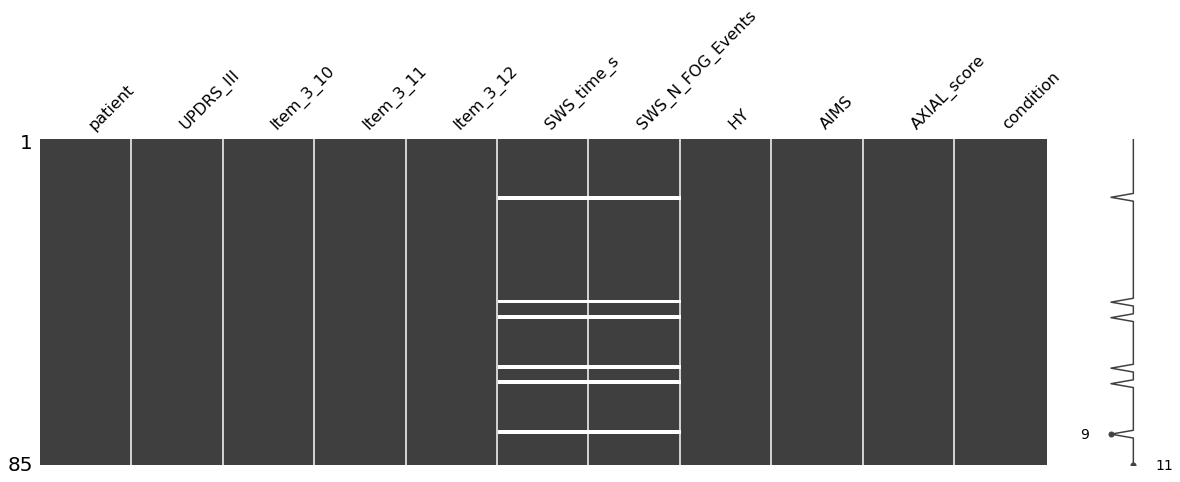

In [10]:
mno.matrix(FOG_Stim_conditions,figsize = (20,6))



---


**Dealing with the NAs by Complete Case Analysis / List wise deletion is not feasible given the number of patients.**

**Inputing a Measure of Central Tendency would significantly skew the data.**

**The best compromise is to predicte the missing values based on the entire dataset.**


---



In [11]:
# Remove patient index

patid_FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,0:1]

In [12]:
# Remove condition label

condition_FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,10:11]

In [13]:
# Select remianing, numeric variables

FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,1:10]

In [14]:
 # Select colunms to predicted / use as predictors
  
missing_columns = ["UPDRS_III","Item_3_10", "Item_3_11", "Item_3_12", "SWS_time_s", "SWS_N_FOG_Events", "HY", "AIMS", "AXIAL_score"]

In [15]:
# Input random numbers on the missing spaces

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [16]:
# Rename new variables
for feature in missing_columns:
    FOG_Stim_conditions[feature + '_imp'] = FOG_Stim_conditions[feature]
    FOG_Stim_conditions = random_imputation(FOG_Stim_conditions, feature)

In [17]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = FOG_Stim_conditions[feature + "_imp"]
    parameters = list(set(FOG_Stim_conditions.columns) - set(missing_columns) - {feature + '_imp'})
    

    model = linear_model.LinearRegression()
    model.fit(X = FOG_Stim_conditions[parameters], y = FOG_Stim_conditions[feature + '_imp'])
    
    deter_data.loc[FOG_Stim_conditions[feature].isnull(), "Det" + feature] = model.predict(FOG_Stim_conditions[parameters])[FOG_Stim_conditions[feature].isnull()]

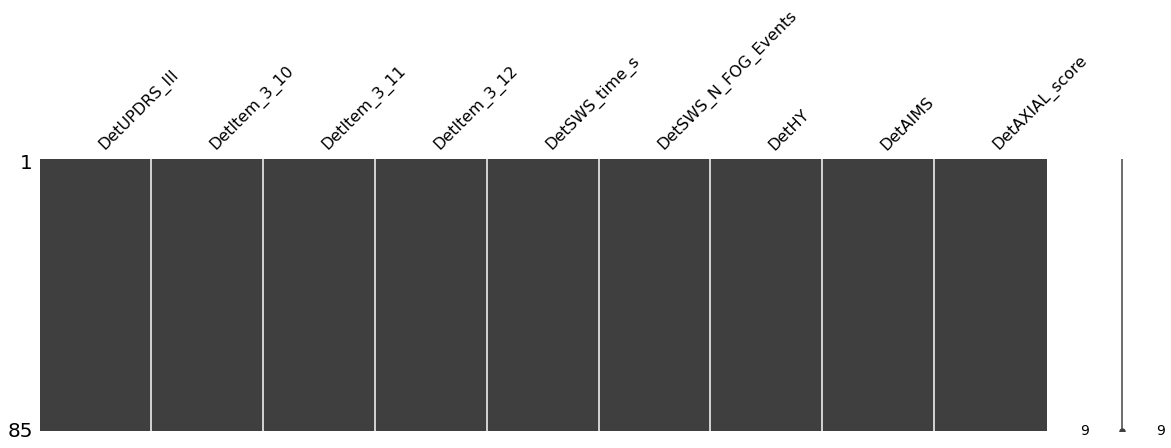

In [18]:
mno.matrix(deter_data, figsize = (20,5))


In [19]:
deter_data

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,DetAXIAL_score
0,55.0,2.0,2.0,0.0,49.0,2.0,2.0,0.0,6.0
1,79.0,2.0,3.0,0.0,75.0,4.0,2.0,0.0,5.0
2,65.0,3.0,4.0,1.0,439.0,34.0,2.0,6.0,9.0
3,75.0,4.0,4.0,4.0,258.0,19.0,5.0,6.0,16.0
4,59.0,2.0,3.0,3.0,111.0,16.0,4.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...
80,44.0,2.0,4.0,0.0,166.0,12.0,3.0,12.0,8.0
81,29.0,2.0,2.0,0.0,55.0,4.0,2.0,20.0,4.0
82,39.0,2.0,2.0,0.0,17.0,1.0,2.0,0.0,4.0
83,42.0,2.0,1.0,0.0,25.0,1.0,2.0,4.0,3.0


In [20]:
deter_data = pd.concat([deter_data, condition_FOG_Stim_conditions], axis = 1)

In [21]:
deter_data

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,DetAXIAL_score,condition
0,55.0,2.0,2.0,0.0,49.0,2.0,2.0,0.0,6.0,MED_OFF_STIM_OFF
1,79.0,2.0,3.0,0.0,75.0,4.0,2.0,0.0,5.0,MED_OFF_STIM_OFF
2,65.0,3.0,4.0,1.0,439.0,34.0,2.0,6.0,9.0,MED_OFF_STIM_OFF
3,75.0,4.0,4.0,4.0,258.0,19.0,5.0,6.0,16.0,MED_OFF_STIM_OFF
4,59.0,2.0,3.0,3.0,111.0,16.0,4.0,32.0,8.0,MED_OFF_STIM_OFF
...,...,...,...,...,...,...,...,...,...,...
80,44.0,2.0,4.0,0.0,166.0,12.0,3.0,12.0,8.0,MED_ON_STIM_ON_60Hz
81,29.0,2.0,2.0,0.0,55.0,4.0,2.0,20.0,4.0,MED_ON_STIM_ON_60Hz
82,39.0,2.0,2.0,0.0,17.0,1.0,2.0,0.0,4.0,MED_ON_STIM_ON_60Hz
83,42.0,2.0,1.0,0.0,25.0,1.0,2.0,4.0,3.0,MED_ON_STIM_ON_60Hz




---


**Check the new distributions.**

**They have not been compromised** 


---



In [ ]:
deter_data.groupby("condition").describe()["DetUPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,62.000000,9.899495,41.0,57.0,61.0,66.0,79.0
MED_OFF_STIM_ON,17.0,45.941176,8.562057,28.0,43.0,47.0,53.0,59.0
MED_ON_STIM_OFF,17.0,49.352941,10.451921,34.0,39.0,51.0,55.0,71.0
MED_ON_STIM_ON,17.0,38.588235,8.522462,21.0,34.0,42.0,45.0,48.0
MED_ON_STIM_ON_60Hz,17.0,40.705882,9.603155,21.0,37.0,41.0,46.0,62.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_10"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,2.647059,0.701888,2.0,2.0,3.0,3.0,4.0
MED_OFF_STIM_ON,17.0,2.352941,0.492592,2.0,2.0,2.0,3.0,3.0
MED_ON_STIM_OFF,17.0,2.529412,0.717430,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON,17.0,2.352941,0.606339,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,2.000000,0.353553,1.0,2.0,2.0,2.0,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_11"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,3.411765,0.795206,2.0,3.0,4.0,4.0,4.0
MED_OFF_STIM_ON,17.0,2.470588,1.545867,0.0,1.0,3.0,4.0,4.0
MED_ON_STIM_OFF,17.0,3.000000,1.224745,1.0,2.0,4.0,4.0,4.0
MED_ON_STIM_ON,17.0,2.411765,1.121318,1.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,2.000000,1.414214,0.0,1.0,2.0,3.0,4.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_12"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,1.882353,1.452685,0.0,1.0,2.0,3.0,4.0
MED_OFF_STIM_ON,17.0,1.117647,1.495090,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_OFF,17.0,1.235294,1.640481,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON,17.0,1.117647,1.615640,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,0.647059,1.114741,0.0,0.0,0.0,1.0,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetSWS_time_s"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,239.756495,198.021505,30.0,75.0,191.0,360.0,599.000000
MED_OFF_STIM_ON,17.0,152.352941,151.172063,19.0,40.0,63.0,240.0,478.000000
MED_ON_STIM_OFF,17.0,143.521887,112.774978,24.0,37.0,154.0,181.0,411.292127
MED_ON_STIM_ON,17.0,76.522518,54.033160,22.0,34.0,62.0,91.0,201.059185
MED_ON_STIM_ON_60Hz,17.0,71.838971,54.225501,17.0,39.0,58.0,71.0,221.000000


In [ ]:
deter_data.groupby("condition").describe()["DetSWS_N_FOG_Events"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,17.359515,15.710110,2.000000,4.0,13.111763,21.0,55.000000
MED_OFF_STIM_ON,17.0,11.235294,13.021758,0.000000,1.0,4.000000,18.0,36.000000
MED_ON_STIM_OFF,17.0,9.279736,7.506312,1.000000,2.0,9.000000,16.0,21.000000
MED_ON_STIM_ON,17.0,6.321597,7.907898,1.000000,2.0,3.000000,6.0,29.253011
MED_ON_STIM_ON_60Hz,17.0,5.075857,8.259507,-0.710438,1.0,2.000000,4.0,31.000000


In [ ]:
deter_data.groupby("condition").describe()["DetHY"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,3.000000,1.118034,2.0,2.0,3.0,4.0,5.0
MED_OFF_STIM_ON,17.0,2.647059,0.861770,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_OFF,17.0,2.705882,1.104802,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON,17.0,2.529412,0.943242,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON_60Hz,17.0,2.176471,0.392953,2.0,2.0,2.0,2.0,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetAIMS"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,4.117647,7.857181,0.0,0.0,0.0,6.0,32.0
MED_OFF_STIM_ON,17.0,3.647059,6.900554,0.0,0.0,0.0,4.0,26.0
MED_ON_STIM_OFF,17.0,9.235294,9.391016,0.0,0.0,8.0,10.0,26.0
MED_ON_STIM_ON,17.0,10.000000,11.958261,0.0,2.0,4.0,18.0,44.0
MED_ON_STIM_ON_60Hz,17.0,12.235294,12.997737,0.0,2.0,6.0,20.0,42.0


In [ ]:
deter_data.groupby("condition").describe()["DetAXIAL_score"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,9.823529,3.828108,3.0,8.0,10.0,12.0,16.0
MED_OFF_STIM_ON,17.0,7.647059,3.516767,2.0,5.0,8.0,11.0,14.0
MED_ON_STIM_OFF,17.0,8.352941,3.463040,5.0,6.0,7.0,10.0,16.0
MED_ON_STIM_ON,17.0,7.411765,4.359742,3.0,5.0,6.0,10.0,19.0
MED_ON_STIM_ON_60Hz,17.0,5.588235,2.575336,1.0,4.0,6.0,7.0,10.0




---

**First perform a Kruskal-Wallis Rank Sum Test for the variables of interest to check whether any differences are observed** 


---



In [ ]:
DetUPDRS_III_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetUPDRS_III"]
DetUPDRS_III_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetUPDRS_III"]

In [ ]:
# UPDRS III is different across groups

scipy.stats.kruskal(DetUPDRS_III_MED_OFF_STIM_OFF, 
              DetUPDRS_III_MED_OFF_STIM_ON, 
              DetUPDRS_III_MED_ON_STIM_OFF,
              DetUPDRS_III_MED_ON_STIM_ON,
              DetUPDRS_III_MED_ON_STIM_ON_60Hz)

KruskalResult(statistic=36.25061941768692, pvalue=2.569724039776283e-07)

In [ ]:
scipy.stats.ranksums(DetUPDRS_III_MED_ON_STIM_ON, DetUPDRS_III_MED_ON_STIM_ON_60Hz)

RanksumsResult(statistic=-0.3272135538709788, pvalue=0.7435063701601989)

In [ ]:
# Walking time is not

DetSWS_time_s_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetSWS_time_s"]
DetSWS_time_s_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetSWS_time_s"]


In [ ]:
scipy.stats.ranksums(DetSWS_time_s_MED_ON_STIM_ON, DetSWS_time_s_MED_ON_STIM_ON_60Hz)

RanksumsResult(statistic=0.46498768181665406, pvalue=0.6419402779493897)

In [ ]:
scipy.stats.ranksums(DetSWS_time_s_MED_OFF_STIM_ON, DetSWS_time_s_MED_OFF_STIM_OFF)

RanksumsResult(statistic=-1.515515407402428, pvalue=0.129641931500049)

In [ ]:
# The number of FOG events is borderline

DetSWS_N_FOG_Events_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetSWS_N_FOG_Events"]


In [ ]:
scipy.stats.ranksums(DetSWS_N_FOG_Events_MED_OFF_STIM_ON, DetSWS_N_FOG_Events_MED_OFF_STIM_OFF)


RanksumsResult(statistic=-1.687733067334522, pvalue=0.09146248113234033)



---

**Perform Kruskal-Wallis with post hoc Dunn's test and p-value adjustment for multiple comparison**

---



In [ ]:
def p_rounder(p_value):
    if p_value < .0001:
        p_value = '<.0001'
    else:
        p_value = str((round(p_value,4)))
    return p_value

def bon_correct(p_value,k):
    corrected_p = p_value * ((k *(k-1))/2)
    return p_value, corrected_p


In [ ]:
def kw_dunn_post_hoc(df,strat,comp_list, var):
    post_hoc_result_dict = {}
    N = df['rank'].count()
    n_groups = df[strat].nunique()
    for comp in comp_list:
        m1 = df.loc[df[strat] == comp[0]]['rank'].mean()
        n1 = df.loc[df[strat] == comp[0]]['rank'].count()
        m2 = df.loc[df[strat] == comp[1]]['rank'].mean()
        n2 = df.loc[df[strat] == comp[1]]['rank'].count()
        Z = (m1 - m2)/math.sqrt(((N*(N+1))/12)*((1/n1)+(1/n2)))
        Z = round(Z,4)
        p = scipy.stats.norm.sf(abs(Z))
        p, corrected_p = bon_correct(p,n_groups)
        p = p_rounder(p)
        corrected_p = p_rounder(corrected_p)
        comparison = f'{comp[0]} vs. {comp[1]}'
        post_hoc_result_dict[comparison] = [var,Z,p,corrected_p]
    return post_hoc_result_dict


In [ ]:
def kw_test(df,stratifier,var):
    import sys
    from math import sqrt
    result_list = []
    strat_list = []
    comparison_list = []
    counter = 0
    temp_df = df[[stratifier,var]].copy()
    temp_df['rank'] = temp_df[var].rank(method='average')
    for strat in df[stratifier].unique():
        result = df.loc[df[stratifier] == strat][var].values
        result_list.append(result)
        strat_list.append(strat)
    for st in strat_list:
        for st2 in strat_list:
            if st != st2 and [st2,st] not in comparison_list:
                comparison_list.append([st,st2])
    post_hoc_result_dict = kw_dunn_post_hoc(temp_df,stratifier,comparison_list,var)
    if len(result_list) == 2:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1])
    if len(result_list) == 3:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2])
    elif len(result_list) == 4:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2],result_list[3])
    elif len(result_list) == 5:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2],result_list[3],result_list[4])
    else:
        print('Stratifying levels greater than 5. Please modify code to accomodate.')
        sys.exit()
    k = round(k,4)    
    p = p_rounder(p)
    return k, p, post_hoc_result_dict

In [ ]:
k, p, post_hoc_result_dict = kw_test(deter_data,'condition','DetUPDRS_III')



---

**Check where the differences actually are**


---



In [ ]:
kw_test(deter_data,'condition','DetUPDRS_III')

(36.2506,
 '<.0001',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetUPDRS_III',
   3.4847,
   '0.0002',
   '0.0025'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetUPDRS_III',
   2.6717,
   '0.0038',
   '0.0377'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   5.3399,
   '<.0001',
   '<.0001'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   4.9196,
   '<.0001',
   '<.0001'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetUPDRS_III',
   -0.813,
   '0.2081',
   '2.0811'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   1.8553,
   '0.0318',
   '0.3178'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   1.4349,
   '0.0757',
   '0.7566'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   2.6682,
   '0.0038',
   '0.0381'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   2.2478,
   '0.0123',
   '0.1229'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   -0.4204,
   '0.3371',
   '3.371']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_10')

(10.7765,
 '0.0292',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_10',
   1.018,
   '0.1543',
   '1.5434'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_10',
   0.5489,
   '0.2915',
   '2.9154'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_10',
   1.1951,
   '0.116',
   '1.1602'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   2.5883,
   '0.0048',
   '0.0482'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_10',
   -0.469,
   '0.3195',
   '3.1953'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_10',
   0.1772,
   '0.4297',
   '4.2968'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   1.5704,
   '0.0582',
   '0.5816'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_10',
   0.6462,
   '0.2591',
   '2.5907'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   2.0394,
   '0.0207',
   '0.2071'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   1.3932,
   '0.0818',
   '0.8178']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_11')

(11.2912,
 '0.0235',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_11',
   1.8761,
   '0.0303',
   '0.3032'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_11',
   0.8477,
   '0.1983',
   '1.983'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_11',
   2.2096,
   '0.0136',
   '0.1357'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   2.8663,
   '0.0021',
   '0.0208'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_11',
   -1.0284,
   '0.1519',
   '1.5188'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_11',
   0.3335,
   '0.3694',
   '3.6938'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   0.9902,
   '0.161',
   '1.6104'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_11',
   1.3619,
   '0.0866',
   '0.8661'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   2.0185,
   '0.0218',
   '0.2177'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   0.6566,
   '0.2557',
   '2.5572']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_12')

(7.4746,
 '0.1128',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_12',
   1.5912,
   '0.0558',
   '0.5578'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_12',
   1.4175,
   '0.0782',
   '0.7817'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_12',
   1.6885,
   '0.0457',
   '0.4566'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   2.3903,
   '0.0084',
   '0.0842'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_12',
   -0.1737,
   '0.4311',
   '4.3105'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_12',
   0.0973,
   '0.4612',
   '4.6124'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.7991,
   '0.2121',
   '2.1212'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_12',
   0.271,
   '0.3932',
   '3.932'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.9728,
   '0.1653',
   '1.6533'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.7018,
   '0.2414',
   '2.414']})

In [ ]:
kw_test(deter_data,'condition','DetSWS_time_s')

(11.3981,
 '0.0224',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetSWS_time_s',
   1.692,
   '0.0453',
   '0.4532'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetSWS_time_s',
   1.3515,
   '0.0883',
   '0.8827'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   2.7377,
   '0.0031',
   '0.0309'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   2.974,
   '0.0015',
   '0.0147'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetSWS_time_s',
   -0.3405,
   '0.3667',
   '3.6674'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   1.0458,
   '0.1478',
   '1.4783'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   1.282,
   '0.0999',
   '0.9992'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   1.3862,
   '0.0828',
   '0.8284'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   1.6225,
   '0.0523',
   '0.5235'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   0.2362,
   '0.4066',
   '4.066

In [ ]:
kw_test(deter_data,'condition','DetSWS_N_FOG_Events')

(14.1516,
 '0.0068',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetSWS_N_FOG_Events',
   2.0185,
   '0.0218',
   '0.2177'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetSWS_N_FOG_Events',
   1.4418,
   '0.0747',
   '0.7468'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   2.5779,
   '0.005',
   '0.0497'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   3.5507,
   '0.0002',
   '0.0019'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetSWS_N_FOG_Events',
   -0.5767,
   '0.2821',
   '2.8207'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   0.5594,
   '0.2879',
   '2.8794'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   1.5321,
   '0.0627',
   '0.6275'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   1.1361,
   '0.128',
   '1.2796'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   2.1089,
   '0.0175',
   '0.1748'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60H

In [ ]:
kw_test(deter_data,'condition','DetHY')

(6.244,
 '0.1817',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetHY',
   0.7643,
   '0.2223',
   '2.2234'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetHY',
   0.8825,
   '0.1888',
   '1.8875'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetHY', 1.2646, '0.103', '1.0301'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   2.0568,
   '0.0199',
   '0.1985'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetHY', 0.1181, '0.453', '4.5299'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetHY', 0.5003, '0.3084', '3.0843'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   1.2924,
   '0.0981',
   '0.9811'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetHY', 0.3822, '0.3512', '3.5116'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   1.1743,
   '0.1201',
   '1.2014'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   0.7921,
   '0.2142',
   '2.1415']})

In [ ]:
kw_test(deter_data,'condition','DetAIMS')

(11.1554,
 '0.0249',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetAIMS',
   0.1772,
   '0.4297',
   '4.2968'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetAIMS',
   -1.89,
   '0.0294',
   '0.2938'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetAIMS',
   -1.8031,
   '0.0357',
   '0.3569'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -2.234,
   '0.0127',
   '0.1274'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetAIMS',
   -2.0672,
   '0.0194',
   '0.1936'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetAIMS',
   -1.9803,
   '0.0238',
   '0.2383'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -2.4111,
   '0.008',
   '0.0795'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetAIMS',
   0.0869,
   '0.4654',
   '4.6538'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -0.344,
   '0.3654',
   '3.6542'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -0.4308,
   '0.3333',
   '3.3331']})

In [ ]:
kw_test(deter_data,'condition','DetAXIAL_score')

(11.7259,
 '0.0195',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetAXIAL_score',
   1.5599,
   '0.0594',
   '0.5939'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetAXIAL_score',
   1.0874,
   '0.1384',
   '1.3843'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetAXIAL_score',
   2.1853,
   '0.0144',
   '0.1443'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetAXIAL_score',
   3.2276,
   '0.0006',
   '0.0062'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetAXIAL_score',
   -0.4725,
   '0.3183',
   '3.1828'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetAXIAL_score',
   0.6254,
   '0.2659',
   '2.6585'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetAXIAL_score',
   1.6676,
   '0.0477',
   '0.477'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetAXIAL_score',
   1.0979,
   '0.1361',
   '1.3612'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetAXIAL_score',
   2.1401,
   '0.0162',
   '0.1617'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetAXIAL_score',
   1.0423,
   '0.1486

   

---


        
              



---


                 



---

---



 **As the data is paired (i.e. it has repeated measures), perform the Friedman Test instead**


---

---







---



---
**Post-hoc pairwise multiple comparison is performed according to Conover with FDR correction**


---



---




In [22]:
deter_data = pd.concat([patid_FOG_Stim_conditions, deter_data], axis = 1)

In [23]:
deter_data

,patient,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,DetAXIAL_score,condition
0,A1,55.0,2.0,2.0,0.0,49.0,2.0,2.0,0.0,6.0,MED_OFF_STIM_OFF
1,B2,79.0,2.0,3.0,0.0,75.0,4.0,2.0,0.0,5.0,MED_OFF_STIM_OFF
2,C3,65.0,3.0,4.0,1.0,439.0,34.0,2.0,6.0,9.0,MED_OFF_STIM_OFF
3,D4,75.0,4.0,4.0,4.0,258.0,19.0,5.0,6.0,16.0,MED_OFF_STIM_OFF
4,E5,59.0,2.0,3.0,3.0,111.0,16.0,4.0,32.0,8.0,MED_OFF_STIM_OFF
...,...,...,...,...,...,...,...,...,...,...,...
80,M13,44.0,2.0,4.0,0.0,166.0,12.0,3.0,12.0,8.0,MED_ON_STIM_ON_60Hz
81,N14,29.0,2.0,2.0,0.0,55.0,4.0,2.0,20.0,4.0,MED_ON_STIM_ON_60Hz
82,O15,39.0,2.0,2.0,0.0,17.0,1.0,2.0,0.0,4.0,MED_ON_STIM_ON_60Hz
83,P16,42.0,2.0,1.0,0.0,25.0,1.0,2.0,4.0,3.0,MED_ON_STIM_ON_60Hz




---
**UPDRS III**


---




In [ ]:
pg.friedman(data=deter_data, dv="DetUPDRS_III", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.757331,4,51.498507,1.756115e-10




---

**Kendall's W is large (>0.1 small effect size, >0.3 moderate effect size, >0.5 large effect size) after Cohen's interpretation guideline.**

---




In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetUPDRS_III", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000e+00,0.000973,0.029924,6.835621e-07,0.000002
MED_OFF_STIM_ON,9.726294e-04,1.000000,0.183673,3.823715e-02,0.079228
MED_ON_STIM_OFF,2.992382e-02,0.183673,1.000000,1.237834e-03,0.003236
MED_ON_STIM_ON,6.835621e-07,0.038237,0.001238,1.000000e+00,0.706784
MED_ON_STIM_ON_60Hz,1.505511e-06,0.079228,0.003236,7.067840e-01,1.000000




---

**SWS Time**

---



In [ ]:
pg.friedman(data=deter_data, dv="DetSWS_time_s", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.298629,4,20.306785,0.000434


In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetSWS_time_s", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000,0.040691,0.492355,0.014753,0.003153
MED_OFF_STIM_ON,0.040691,1.000000,0.187393,0.557175,0.263697
MED_ON_STIM_OFF,0.492355,0.187393,1.000000,0.062907,0.014753
MED_ON_STIM_ON,0.014753,0.557175,0.062907,1.000000,0.505949
MED_ON_STIM_ON_60Hz,0.003153,0.263697,0.014753,0.505949,1.000000



---

**Number of FOG Events**

---




In [ ]:
pg.friedman(data=deter_data, dv="DetSWS_N_FOG_Events", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.275418,4,18.728395,0.000889


In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetSWS_N_FOG_Events", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000,0.061755,0.118037,0.011168,0.001616
MED_OFF_STIM_ON,0.061755,1.000000,0.622779,0.494182,0.193561
MED_ON_STIM_OFF,0.118037,0.622779,1.000000,0.301551,0.102168
MED_ON_STIM_ON,0.011168,0.494182,0.301551,1.000000,0.494182
MED_ON_STIM_ON_60Hz,0.001616,0.193561,0.102168,0.494182,1.000000



---

*Item 10*

---



In [ ]:
pg.friedman(data=deter_data, dv="DetItem_3_10", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.190826,4,12.97619,0.011393


In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetItem_3_10", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000,0.318979,0.714187,0.289803,0.014012
MED_OFF_STIM_ON,0.318979,1.000000,0.495082,0.877037,0.158753
MED_ON_STIM_OFF,0.714187,0.495082,1.000000,0.452021,0.027481
MED_ON_STIM_ON,0.289803,0.877037,0.452021,1.000000,0.167215
MED_ON_STIM_ON_60Hz,0.014012,0.158753,0.027481,0.167215,1.000000



---

*Item 11*

---



In [ ]:
pg.friedman(data=deter_data, dv="DetItem_3_11", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.203938,4,13.867769,0.007729


In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetItem_3_11", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000,0.069919,0.582951,0.096713,0.021493
MED_OFF_STIM_ON,0.069919,1.000000,0.177921,0.798866,0.510908
MED_ON_STIM_OFF,0.582951,0.177921,1.000000,0.243520,0.064400
MED_ON_STIM_ON,0.096713,0.798866,0.243520,1.000000,0.401292
MED_ON_STIM_ON_60Hz,0.021493,0.510908,0.064400,0.401292,1.000000



---

*Item 12*

---



In [ ]:
pg.friedman(data=deter_data, dv="DetItem_3_12", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.370242,4,25.176471,0.000046


In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetItem_3_12", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000,0.003910,0.027887,0.003910,0.000074
MED_OFF_STIM_ON,0.003910,1.000000,0.484309,0.930847,0.239161
MED_ON_STIM_OFF,0.027887,0.484309,1.000000,0.483617,0.053792
MED_ON_STIM_ON,0.003910,0.930847,0.483617,1.000000,0.240223
MED_ON_STIM_ON_60Hz,0.000074,0.239161,0.053792,0.240223,1.000000



---

*Axial Score*

---

In [ ]:
pg.friedman(data=deter_data, dv="DetAXIAL_score", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.262517,4,17.851133,0.00132


In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetAXIAL_score", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000,0.092595,0.726647,0.103163,0.005140
MED_OFF_STIM_ON,0.092595,1.000000,0.152705,0.866424,0.205208
MED_ON_STIM_OFF,0.726647,0.152705,1.000000,0.171296,0.010422
MED_ON_STIM_ON,0.103163,0.866424,0.171296,1.000000,0.171296
MED_ON_STIM_ON_60Hz,0.005140,0.205208,0.010422,0.171296,1.000000





---


---
**PLOT DATA**


---



---



In [ ]:
sns.set(style="whitegrid")

[Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

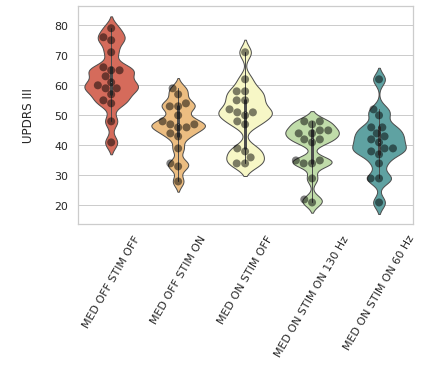

In [ ]:

ax = sns.violinplot(x="condition", y="DetUPDRS_III", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetUPDRS_III", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n UPDRS III \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM OFF', 'MED OFF STIM ON', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])


In [ ]:
# Plot data
sns.set(style="whitegrid")

[Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

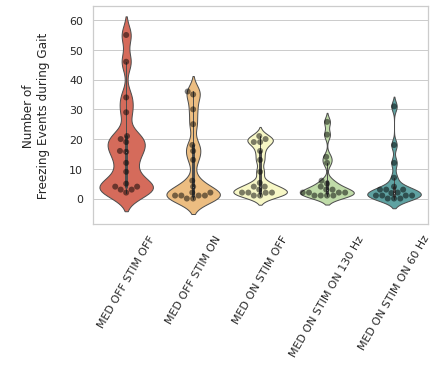

In [ ]:
ax = sns.violinplot(x="condition", y="DetSWS_N_FOG_Events", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetSWS_N_FOG_Events", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 6, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Number of \n Freezing Events during Gait \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM OFF', 'MED OFF STIM ON', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

[Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

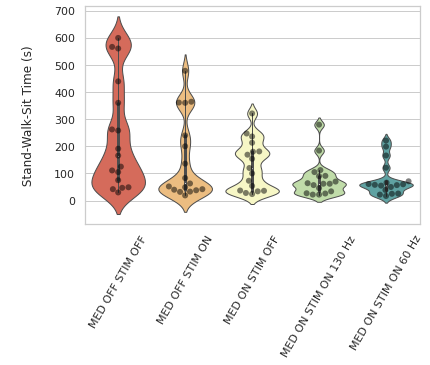

In [ ]:
ax = sns.violinplot(x="condition", y="DetSWS_time_s", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetSWS_time_s", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 6, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Stand-Walk-Sit Time (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM OFF', 'MED OFF STIM ON', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

[Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

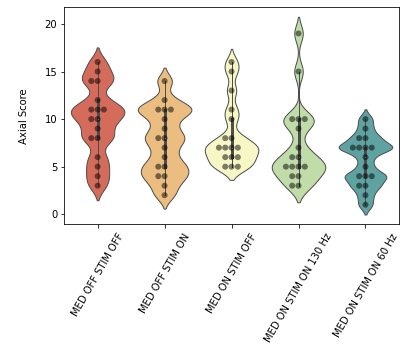

In [ ]:
ax = sns.violinplot(x="condition", y="DetAXIAL_score", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetAXIAL_score", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 6, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Axial Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM OFF', 'MED OFF STIM ON', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

In [ ]:
deter_data = pd.concat([patid_FOG_Stim_conditions, deter_data], axis = 1)

In [ ]:
DetUPDRS_III_OFF = pd.DataFrame(
    deter_data.DetUPDRS_III[deter_data.condition == "MED_OFF_STIM_OFF"]
    ).rename(columns={"DetUPDRS_III": "DetUPDRS_III_OFF"}).reset_index(drop=True)

DetUPDRS_III_60Hz = pd.DataFrame(
    deter_data.DetUPDRS_III[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetUPDRS_III": "DetUPDRS_III_60Hz"}).reset_index(drop=True)

OFF_to60Hz = DetUPDRS_III_OFF.join(DetUPDRS_III_60Hz)

OFF_to60Hz = DetUPDRS_III_OFF.join(DetUPDRS_III_60Hz)

OFF_to60Hz["Difference"] =   OFF_to60Hz["DetUPDRS_III_60Hz"] / OFF_to60Hz["DetUPDRS_III_OFF"]

OFF_to60Hz.sort_values("Difference", ascending=False)

,DetUPDRS_III_OFF,DetUPDRS_III_60Hz,Difference
0,55.0,50.0,0.909091
5,59.0,52.0,0.881356
11,71.0,62.0,0.873239
14,48.0,39.0,0.812500
4,59.0,46.0,0.779661
10,41.0,29.0,0.707317
9,54.0,38.0,0.703704
12,66.0,44.0,0.666667
16,65.0,41.0,0.630769
3,75.0,46.0,0.613333


In [ ]:
DetUPDRS_III_ON = pd.DataFrame(
    deter_data.DetUPDRS_III[deter_data.condition == "MED_ON_STIM_ON"]
    ).rename(columns={"DetUPDRS_III": "DetUPDRS_III_ON"}).reset_index(drop=True)

DetUPDRS_III_60Hz = pd.DataFrame(
    deter_data.DetUPDRS_III[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetUPDRS_III": "DetUPDRS_III_60Hz"}).reset_index(drop=True)

ON_to60Hz = DetUPDRS_III_ON.join(DetUPDRS_III_60Hz)

ON_to60Hz = DetUPDRS_III_ON.join(DetUPDRS_III_60Hz)

ON_to60Hz["Difference"] =   ON_to60Hz["DetUPDRS_III_60Hz"] / ON_to60Hz["DetUPDRS_III_ON"]

ON_to60Hz.sort_values("Difference", ascending=False)

,DetUPDRS_III_ON,DetUPDRS_III_60Hz,Difference
11,42.0,62.0,1.476190
10,21.0,29.0,1.380952
9,29.0,38.0,1.310345
14,34.0,39.0,1.147059
0,44.0,50.0,1.136364
5,48.0,52.0,1.083333
6,35.0,37.0,1.057143
4,45.0,46.0,1.022222
16,42.0,41.0,0.976190
8,35.0,34.0,0.971429


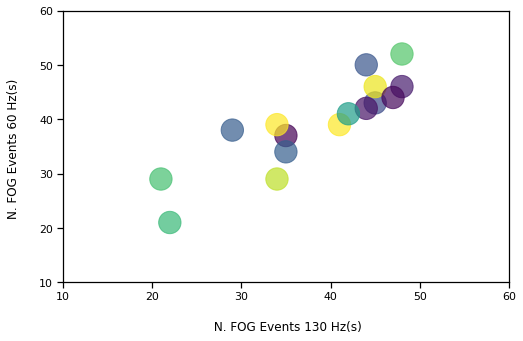

In [ ]:


fig, ax = plt.subplots(figsize=(8, 5))

colors = np.random.rand(17)
area = (30 * np.random.rand(17))**2

ax.scatter(x = ON_to60Hz['DetUPDRS_III_ON'], y = ON_to60Hz['DetUPDRS_III_60Hz'], s = 500, alpha=0.7, c=colors)
plt.xlabel("\n N. FOG Events 130 Hz(s)")
plt.ylabel("N. FOG Events 60 Hz(s) \n")

plt.xlim([10, 60])
plt.ylim([10, 60])

plt.show()

In [ ]:
DetSWS_N_FOG_Events_OFF = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_OFF_STIM_OFF"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_OFF"}).reset_index(drop=True)

DetSWS_N_FOG_Events_60Hz = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_60Hz"}).reset_index(drop=True)

OFF_to60Hz = DetSWS_N_FOG_Events_OFF.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz = DetSWS_N_FOG_Events_OFF.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz["Difference"] =   ((OFF_to60Hz["DetSWS_N_FOG_Events_OFF"] - OFF_to60Hz["DetSWS_N_FOG_Events_60Hz"]) / OFF_to60Hz["DetSWS_N_FOG_Events_OFF"])*100

OFF_to60Hz.sort_values("Difference", ascending=False)

,DetSWS_N_FOG_Events_OFF,DetSWS_N_FOG_Events_60Hz,Difference
8,46.000000,-0.710438,101.544431
9,9.000000,0.000000,100.000000
16,29.000000,0.000000,100.000000
2,34.000000,0.000000,100.000000
3,19.000000,1.000000,94.736842
15,13.111763,1.000000,92.373261
6,55.000000,7.000000,87.272727
7,20.000000,3.000000,85.000000
14,5.000000,1.000000,80.000000
1,4.000000,1.000000,75.000000


In [ ]:
DetSWS_N_FOG_Events_ON = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_ON_STIM_ON"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_ON"}).reset_index(drop=True)

DetSWS_N_FOG_Events_60Hz = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_60Hz"}).reset_index(drop=True)

ON_to60Hz = DetSWS_N_FOG_Events_ON.join(DetSWS_N_FOG_Events_60Hz)

ON_to60Hz = DetSWS_N_FOG_Events_ON.join(DetSWS_N_FOG_Events_60Hz)

ON_to60Hz["Difference"] =  ((ON_to60Hz["DetSWS_N_FOG_Events_ON"] - ON_to60Hz["DetSWS_N_FOG_Events_60Hz"]) / ON_to60Hz["DetSWS_N_FOG_Events_ON"])*100

ON_to60Hz.sort_values("Difference", ascending=False)

,DetSWS_N_FOG_Events_ON,DetSWS_N_FOG_Events_60Hz,Difference
8,29.253011,-0.710438,102.428599
9,1.000000,0.000000,100.000000
16,3.000000,0.000000,100.000000
2,1.000000,0.000000,100.000000
1,6.000000,1.000000,83.333333
3,2.000000,1.000000,50.000000
14,2.000000,1.000000,50.000000
6,12.000000,7.000000,41.666667
12,19.214132,12.000000,37.545968
7,4.000000,3.000000,25.000000


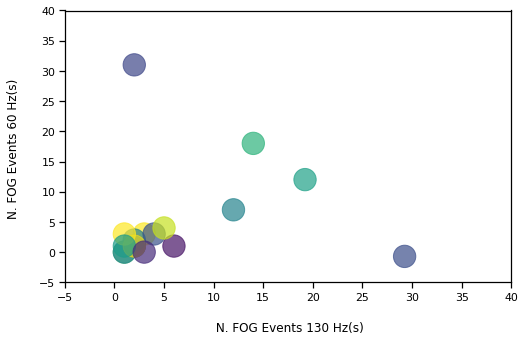

In [ ]:


fig, ax = plt.subplots(figsize=(8, 5))

colors = np.random.rand(17)
area = (30 * np.random.rand(17))**2

ax.scatter(x = ON_to60Hz['DetSWS_N_FOG_Events_ON'], y = ON_to60Hz['DetSWS_N_FOG_Events_60Hz'], s = 500, alpha=0.7, c=colors)
plt.xlabel("\n N. FOG Events 130 Hz(s)")
plt.ylabel("N. FOG Events 60 Hz(s) \n")

plt.xlim([-5, 40])
plt.ylim([-5, 40])

plt.show()

In [ ]:
DetSWS_time_s_ON = pd.DataFrame(
    deter_data.DetSWS_time_s[deter_data.condition == "MED_OFF_STIM_ON"]
    ).rename(columns={"DetSWS_time_s": "DetSWS_time_s_ON"}).reset_index(drop=True)

DetSWS_time_s_60Hz = pd.DataFrame(
    deter_data.DetSWS_time_s[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetSWS_time_s": "DetSWS_time_s_60Hz"}).reset_index(drop=True)

ON_to60Hz = DetSWS_time_s_ON.join(DetSWS_time_s_60Hz)

ON_to60Hz = DetSWS_time_s_ON.join(DetSWS_time_s_60Hz)

ON_to60Hz["Difference"] =  ((ON_to60Hz["DetSWS_time_s_ON"] - ON_to60Hz["DetSWS_time_s_60Hz"]) / ON_to60Hz["DetSWS_time_s_ON"])*100

ON_to60Hz.sort_values("Difference", ascending=False)

,DetSWS_time_s_ON,DetSWS_time_s_60Hz,Difference
15,360.0,25.000000,93.055556
7,200.0,39.000000,80.500000
16,364.0,71.000000,80.494505
13,240.0,55.000000,77.083333
12,478.0,166.000000,65.271967
6,136.0,60.000000,55.882353
2,40.0,22.000000,45.000000
8,361.0,198.698137,44.958965
3,83.0,57.000000,31.325301
9,32.0,26.000000,18.750000


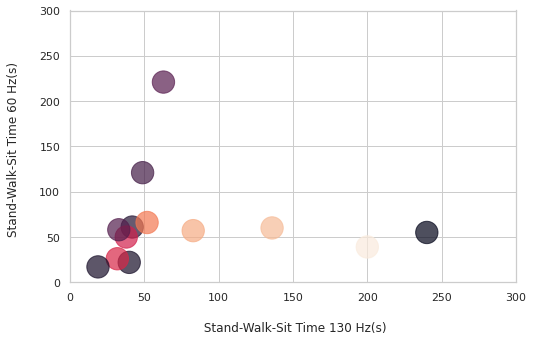

In [ ]:


fig, ax = plt.subplots(figsize=(8, 5))

colors = np.random.rand(17)
area = (30 * np.random.rand(17))**2

ax.scatter(x = ON_to60Hz['DetSWS_time_s_ON'], y = ON_to60Hz['DetSWS_time_s_60Hz'], s = 500, alpha=0.7, c=colors)
plt.xlabel("\n Stand-Walk-Sit Time 130 Hz(s)")
plt.ylabel("Stand-Walk-Sit Time 60 Hz(s) \n")

plt.xlim([0, 300])
plt.ylim([0, 300])

plt.show()

In [ ]:
DetItem10_ON = pd.DataFrame(
    deter_data.DetItem_3_10[deter_data.condition == "MED_OFF_STIM_ON"]
    ).rename(columns={"DetItem_3_10": "DetItem_3_10_ON"}).reset_index(drop=True)

DetItem10_60Hz = pd.DataFrame(
    deter_data.DetItem_3_10[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetItem_3_10": "DetItem_3_10_60Hz"}).reset_index(drop=True)

ON_to60Hz = DetItem10_ON.join(DetItem10_60Hz)
ON_to60Hz["Difference"] = ((ON_to60Hz["DetItem_3_10_ON"] - ON_to60Hz["DetItem_3_10_60Hz"]) / ON_to60Hz["DetItem_3_10_ON"])*100

ON_to60Hz.sort_values("Difference", ascending=False)

,DetItem_3_10_ON,DetItem_3_10_60Hz,Difference
2,2.0,1.0,50.000000
8,3.0,2.0,33.333333
6,3.0,2.0,33.333333
15,3.0,2.0,33.333333
13,3.0,2.0,33.333333
12,3.0,2.0,33.333333
16,3.0,2.0,33.333333
7,2.0,2.0,0.000000
1,2.0,2.0,0.000000
9,2.0,2.0,0.000000


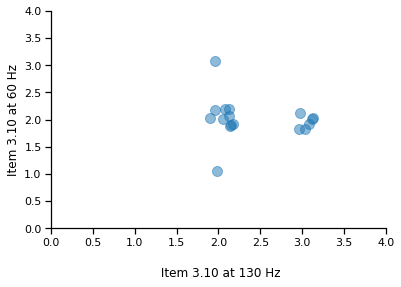

In [ ]:
sns.set_context("notebook")
fig, ax = plt.subplots()

sns.regplot(x = ON_to60Hz['DetItem_3_10_ON'], 
            y = ON_to60Hz['DetItem_3_10_60Hz'], 
            fit_reg = False, 
            ax=ax,
           x_jitter = 0.2, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 0.5, 's':100}
            ).set(xlabel="\n Item 3.10 at 130 Hz", 
                                               ylabel="Item 3.10 at 60 Hz")
            
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
sns.despine()
plt.show()



In [ ]:
DetItem11_ON = pd.DataFrame(
    deter_data.DetItem_3_11[deter_data.condition == "MED_OFF_STIM_ON"]
    ).rename(columns={"DetItem_3_11": "DetItem_3_11_ON"}).reset_index(drop=True)

DetItem11_60Hz = pd.DataFrame(
    deter_data.DetItem_3_11[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetItem_3_11": "DetItem_3_11_60Hz"}).reset_index(drop=True)

ON_to60Hz = DetItem11_ON.join(DetItem11_60Hz)
ON_to60Hz["Difference"] = ((ON_to60Hz["DetItem_3_11_ON"] - ON_to60Hz["DetItem_3_11_60Hz"]) / ON_to60Hz["DetItem_3_11_ON"])*100

ON_to60Hz.sort_values("Difference", ascending=False)

,DetItem_3_11_ON,DetItem_3_11_60Hz,Difference
16,4.0,0.0,100.000000
9,2.0,0.0,100.000000
2,3.0,0.0,100.000000
15,4.0,1.0,75.000000
8,4.0,1.0,75.000000
7,4.0,2.0,50.000000
13,4.0,2.0,50.000000
6,4.0,3.0,25.000000
12,4.0,4.0,0.000000
3,2.0,2.0,0.000000


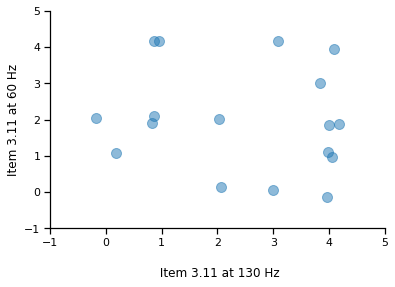

In [ ]:
sns.set_context("notebook")
fig, ax = plt.subplots()

sns.regplot(x = ON_to60Hz['DetItem_3_11_ON'], 
            y = ON_to60Hz['DetItem_3_11_60Hz'], 
            fit_reg = False, 
            ax=ax,
            x_jitter = 0.2, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 0.5, 's':100}
            ).set(xlabel="\n Item 3.11 at 130 Hz", 
                                               ylabel="Item 3.11 at 60 Hz")
            
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
sns.despine()
plt.show()



In [ ]:
DetItem12_ON = pd.DataFrame(
    deter_data.DetItem_3_12[deter_data.condition == "MED_OFF_STIM_ON"]
    ).rename(columns={"DetItem_3_12": "DetItem_3_12_ON"}).reset_index(drop=True)

DetItem12_60Hz = pd.DataFrame(
    deter_data.DetItem_3_12[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetItem_3_12": "DetItem_3_12_60Hz"}).reset_index(drop=True)

ON_to60Hz = DetItem12_ON.join(DetItem12_60Hz)
ON_to60Hz["Difference"] = ((ON_to60Hz["DetItem_3_12_ON"] - ON_to60Hz["DetItem_3_12_60Hz"]) / ON_to60Hz["DetItem_3_12_ON"])*100

ON_to60Hz.sort_values("Difference", ascending=False)

,DetItem_3_12_ON,DetItem_3_12_60Hz,Difference
9,1.0,0.0,100.000000
12,4.0,0.0,100.000000
3,3.0,1.0,66.666667
4,3.0,2.0,33.333333
8,3.0,2.0,33.333333
5,3.0,3.0,0.000000
16,2.0,3.0,-50.000000
0,0.0,0.0,NaN
1,0.0,0.0,NaN
2,0.0,0.0,NaN


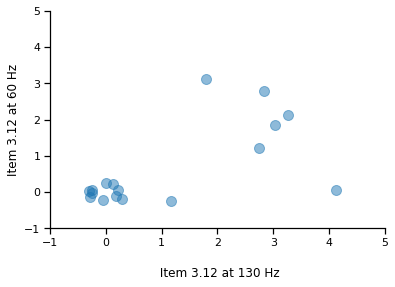

In [ ]:
sns.set_context("notebook")
fig, ax = plt.subplots()

sns.regplot(x = ON_to60Hz['DetItem_3_12_ON'], 
            y = ON_to60Hz['DetItem_3_12_60Hz'], 
            fit_reg = False, 
            ax=ax,
            x_jitter = 0.3, y_jitter = 0.3, 
            scatter_kws = {'alpha' : 0.5, 's':100}
            ).set(xlabel="\n Item 3.12 at 130 Hz", 
                                               ylabel="Item 3.12 at 60 Hz")
            
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
sns.despine()
plt.show()



_________________________________________________

_________________________________________________

COMPARE PROPORTIONS WITH/WITHOUT FOG ACROSS GROUPS 

___________________________________

In [27]:
temp = deter_data[['DetSWS_N_FOG_Events', 'condition']]

In [ ]:
temp['FOG'] =  np.nan
temp['FOG'] = temp['FOG'].mask(temp.DetSWS_N_FOG_Events == 0 ,0).mask(temp.DetSWS_N_FOG_Events != 0, 1)

In [36]:
temp.groupby(['condition', 'FOG']).count()

DetSWS_N_FOG_Events
condition           FOG                     
MED_OFF_STIM_OFF    1.0                   17
MED_OFF_STIM_ON     0.0                    2
                    1.0                   15
MED_ON_STIM_OFF     1.0                   17
MED_ON_STIM_ON      1.0                   17
MED_ON_STIM_ON_60Hz 0.0                    3
                    1.0                   14

In [39]:
res = fisher_exact([ [0,3], [17,14] ])
res

(0.0, 0.22727272727272713)

*WILCOXON TEST LEDD AND RESPONSE % *

In [ ]:
DOPA_df = pd.read_csv('DOPA.csv', sep = ';')

In [ ]:
print(DOPA_df)

    patient  LEDD   LCT      condition
0         1  1510  80.0  BeforeSurgery
1         2  1670  58.0  BeforeSurgery
2         3  1680  68.0  BeforeSurgery
3         4  2205  63.0  BeforeSurgery
4         5  1250  49.0  BeforeSurgery
5         6   915  70.0  BeforeSurgery
6         7   825  63.0  BeforeSurgery
7         8  1200  58.0  BeforeSurgery
8         9   940  76.0  BeforeSurgery
9        10  1360  36.0  BeforeSurgery
10       11  1575   NaN  BeforeSurgery
11       12  1430  29.0  BeforeSurgery
12       13  1880  59.0  BeforeSurgery
13       14   780  45.0  BeforeSurgery
14       15   700  50.0  BeforeSurgery
15       16   840  49.0  BeforeSurgery
16       17  1320  45.0  BeforeSurgery
17        1  1000   0.0   AfterSurgery
18        2  1000  30.0   AfterSurgery
19        3   486  26.0   AfterSurgery
20        4  1210   5.0   AfterSurgery
21        5  1440  12.0   AfterSurgery
22        6   650  14.0   AfterSurgery
23        7   865  18.0   AfterSurgery
24        8   790  46.0  

In [ ]:
DOPA_df.dtypes

patient        int64
LEDD           int64
LCT          float64
condition     object
dtype: object

In [ ]:
DOPA_df.groupby("condition").describe()["LEDD"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
AfterSurgery,17.0,838.000000,467.091934,250.0,525.0,790.0,1000.0,2160.0
BeforeSurgery,17.0,1298.823529,428.316214,700.0,915.0,1320.0,1575.0,2205.0


In [ ]:
DOPA_df.groupby("condition").describe()["LCT"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
AfterSurgery,17.0,20.058824,13.399956,0.0,11.0,18.0,28.00,46.0
BeforeSurgery,16.0,56.125000,13.989877,29.0,48.0,58.0,64.25,80.0


In [ ]:
LEDD_BeforeSurgery = DOPA_df.loc[(DOPA_df["condition"] == "BeforeSurgery"),"LEDD"]
LEDD_AfterSurgery = DOPA_df.loc[(DOPA_df["condition"] == "AfterSurgery"),"LEDD"]
LEDD_BeforeSurgery

0     1510
1     1670
2     1680
3     2205
4     1250
5      915
6      825
7     1200
8      940
9     1360
10    1575
11    1430
12    1880
13     780
14     700
15     840
16    1320
Name: LEDD, dtype: int64

In [ ]:
scipy.stats.ranksums(LEDD_BeforeSurgery, LEDD_AfterSurgery)

RanksumsResult(statistic=2.7899260908999244, pvalue=0.005272007491824873)

In [ ]:
LEDD_BeforeSurgery = DOPA_df.loc[(DOPA_df["condition"] == "BeforeSurgery"),"LCT"]
LEDD_AfterSurgery = DOPA_df.loc[(DOPA_df["condition"] == "AfterSurgery"),"LCT"]
LEDD_BeforeSurgery

0     80.0
1     58.0
2     68.0
3     63.0
4     49.0
5     70.0
6     63.0
7     58.0
8     76.0
9     36.0
10     NaN
11    29.0
12    59.0
13    45.0
14    50.0
15    49.0
16    45.0
Name: LCT, dtype: float64

In [ ]:
scipy.stats.ranksums(LEDD_BeforeSurgery, LEDD_AfterSurgery)

RanksumsResult(statistic=4.66709858415975, pvalue=3.0548277963509113e-06)